### ANN model for Churn Prediction

In [1]:
import tensorflow as tf
print("TF Version:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))

C:\Anaconda\envs\tf_gpu\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(



TF Version: 2.15.0
GPU Available: []


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import matplotlib
print(matplotlib.__version__)  # Should show your installed version

3.6.3


In [3]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

Divide the dataset into independent and dependent features
Here, we dont want features like RowNumber CustomerId and surname

In [4]:
X = df.iloc[:,3:13]
y = df.iloc[:,13]

In [24]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [5]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

Now, we see the dataset is not really clean,
there are many categorical features like gender, geography

#### Feature engineering part

In [6]:
geography = pd.get_dummies(X['Geography'],drop_first=True)
geography

,Germany,Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True
...,...,...
9995,False,False
9996,False,False
9997,False,False
9998,True,False


In [7]:
# Convert all boolean columns in 'geography' to int64 explicitly
geography = geography.replace({False: 0, True: 1}).astype('int64')

# Now concatenate
geography

C:\Users\shiva\AppData\Local\Temp\ipykernel_31640\2265303579.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  geography = geography.replace({False: 0, True: 1}).astype('int64')


,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [8]:
gender = pd.get_dummies(X['Gender'],drop_first=True)
gender

,Male
0,False
1,False
2,False
3,False
4,False
...,...
9995,True
9996,True
9997,False
9998,True


In [9]:
# Convert all boolean columns in 'geography' to int64 explicitly
gender = gender.replace({False: 0, True: 1}).astype('int64')
gender

C:\Users\shiva\AppData\Local\Temp\ipykernel_31640\2235935320.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gender = gender.replace({False: 0, True: 1}).astype('int64')


,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


#### Concatenate these vaiables with dataframe(df)
There are some debugging code in between to tackle the misalignment and dtype clashes in concatenation

In [10]:
# Now first we drop the geo and gender features
X=X.drop(['Geography','Gender'],axis=1)
X.head(0)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary


In [11]:
print(geography.dtypes)  # Check if columns are 'int64'
print(geography.applymap(type).nunique())  # Look for mixed types

Germany    int64
Spain      int64
dtype: object
Germany    1
Spain      1
dtype: int64


C:\Users\shiva\AppData\Local\Temp\ipykernel_31640\3828458983.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(geography.applymap(type).nunique())  # Look for mixed types


In [12]:
# Ensure all values are properly converted to integers
geography = geography.astype(int)

print(geography.dtypes)  # Check if columns are 'int64'
print(geography.applymap(type).nunique())  # Look for mixed types

Germany    int32
Spain      int32
dtype: object
Germany    1
Spain      1
dtype: int64


C:\Users\shiva\AppData\Local\Temp\ipykernel_31640\3358207139.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(geography.applymap(type).nunique())  # Look for mixed types


In [13]:
# Replace all missing values first
print(geography.info)
geography = geography.fillna(0).replace({False: 0, True: 1})

<bound method DataFrame.info of       Germany  Spain
0           0      0
1           0      1
2           0      0
3           0      0
4           0      1
...       ...    ...
9995        0      0
9996        0      0
9997        0      0
9998        1      0
9999        0      0

[10000 rows x 2 columns]>


In [15]:
geography = geography.replace({
    True: 1,
    False: 0,
    'True': 1,
    'False': 0
}).astype('int64')
gender = gender.replace({
    True: 1,
    False: 0,
    'True': 1,
    'False': 0
}).astype('int64')

In [16]:
X = X.reset_index(drop=True)
geography = geography.reset_index(drop=True)
gender = gender.reset_index(drop=True)

In [18]:
print("X index:", X.index)
print("geography index:", geography.index)

X index: RangeIndex(start=0, stop=10000, step=1)
geography index: RangeIndex(start=0, stop=10000, step=1)


In [21]:
# Force consistent dtypes before concat
X = X.astype(float)  # Temporary conversion to prevent upcasting
geography = geography.astype(float)
gender = gender.astype(float)
X=pd.concat([X, geography,gender], axis=1).astype(int)  # Convert back to int

In [22]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0,1,1,1,101348,0,0,0
1,608,41,1,83807,1,0,1,112542,0,1,0
2,502,42,8,159660,3,1,0,113931,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0
4,850,43,2,125510,1,1,1,79084,0,1,0


In [27]:
X.to_csv('input_para.csv', index=False)

In [5]:
X=pd.read_csv("input_para.csv")
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0,1,1,1,101348,0,0,0
1,608,41,1,83807,1,0,1,112542,0,1,0
2,502,42,8,159660,3,1,0,113931,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0
4,850,43,2,125510,1,1,1,79084,0,1,0


#### Splitting the dataset into training and test set

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)

#### Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

1)learn what is Std Scalar, min and max scalar
2)learn why we apply fit_transform on train and transform on train data

In [10]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [11]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [12]:
X_train.shape

(8000, 11)

### Now lets create ANN

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [14]:
### Lets initialize the ANN
classifier=Sequential()

In [15]:
### Adding the input layer
classifier.add(Dense(units=11,activation='relu'))

In [16]:
### adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [17]:
### adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [18]:
### output layer
classifier.add(Dense(1,activation='sigmoid'))

In [19]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

#### Training the model

In [27]:
model_history = classifier.fit(X_train,y_train, validation_split=0.33,batch_size=10,epochs=1000)

Epoch 1/1000


543/543 [==============================] - 3s 2ms/step - loss: 0.4922 - accuracy: 0.7960 - val_loss: 0.4541 - val_accuracy: 0.7951
Epoch 2/1000
543/543 [==============================] - 1s 2ms/step - loss: 0.4398 - accuracy: 0.7964 - val_loss: 0.4314 - val_accuracy: 0.7951
Epoch 3/1000
543/543 [==============================] - 1s 2ms/step - loss: 0.4214 - accuracy: 0.7980 - val_loss: 0.4200 - val_accuracy: 0.7973
Epoch 4/1000
543/543 [==============================] - 1s 2ms/step - loss: 0.4074 - accuracy: 0.8177 - val_loss: 0.4071 - val_accuracy: 0.8276
Epoch 5/1000
543/543 [==============================] - 1s 2ms/step - loss: 0.3927 - accuracy: 0.8341 - val_loss: 0.3959 - val_accuracy: 0.8332
Epoch 6/1000
543/543 [==============================] - 1s 2ms/step - loss: 0.3784 - accuracy: 0.8441 - val_loss: 0.3825 - val_accuracy: 0.8381
Epoch 7/1000
543/543 [==============================] - 1s 2ms/step - loss: 0.3646 - accuracy: 0.8472 - val_loss: 0.3735 - val_accurac


KeyboardInterrupt



here you can see the accuracy is stanent from somepoint, this we dont need to run any more epochs, thus we apply early stopping

In [21]:
## Early Stopping - when accuracy is not increasing , the training stops

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [22]:
model_history = classifier.fit(X_train,y_train, validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000


536/536 [==============================] - 2s 2ms/step - loss: 0.5020 - accuracy: 0.7772 - val_loss: 0.4532 - val_accuracy: 0.7959
Epoch 2/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.4393 - accuracy: 0.7964 - val_loss: 0.4374 - val_accuracy: 0.7989
Epoch 3/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.4248 - accuracy: 0.8048 - val_loss: 0.4288 - val_accuracy: 0.8141
Epoch 4/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.4122 - accuracy: 0.8169 - val_loss: 0.4211 - val_accuracy: 0.8220
Epoch 5/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3968 - accuracy: 0.8317 - val_loss: 0.4034 - val_accuracy: 0.8289
Epoch 6/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3783 - accuracy: 0.8391 - val_loss: 0.3865 - val_accuracy: 0.8353
Epoch 7/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.3620 - accuracy: 0.8500 - val_loss: 0.3778 - val_accurac

so it stopped at 35 epochs

In [23]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

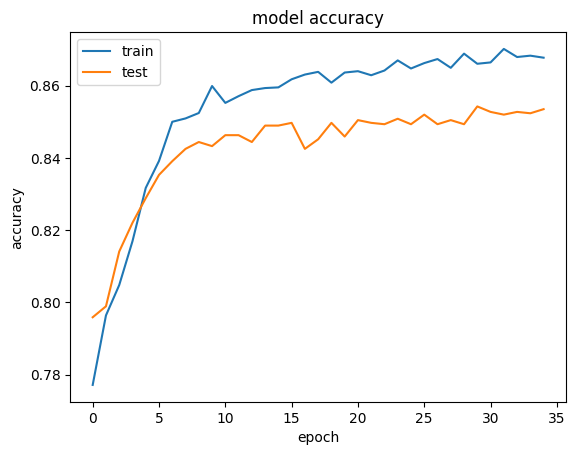

In [24]:
### sumarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

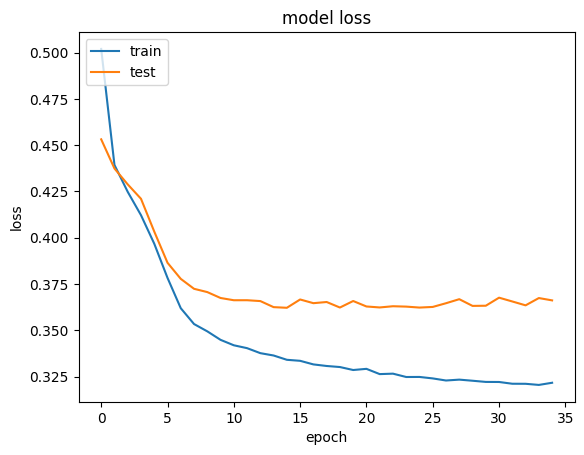

In [25]:
### sumarize history for accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

#### Let's do prediction on some test data

In [26]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 1ms/step


In [27]:
### now make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [28]:
cm

array([[1515,   80],
       [ 197,  208]], dtype=int64)

In [29]:
### calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)

In [30]:
score

0.8615

#### Get the weights 
you can save this as a pikle file

In [31]:
classifier.get_weights()

[array([[ 0.1135981 , -0.03290277, -0.1286373 , -0.5931395 ,  0.4617579 ,
          0.10268065, -0.01172052,  0.12125849,  0.0954942 , -0.21299446,
         -0.04277611],
        [-0.59102136, -0.28918627, -0.1556473 , -0.3373524 , -0.16248497,
         -0.06107374,  0.06016862, -0.74891615, -0.91853577, -0.42605963,
         -0.254043  ],
        [ 0.03353384,  0.51676124,  0.02930124, -0.2867258 ,  0.47618833,
          0.03547155, -0.08937881,  0.02687194, -0.41798624,  0.08304326,
          0.12892044],
        [-0.0288076 ,  0.02691282, -0.33388048, -0.18899745, -0.7294645 ,
         -0.18314601,  0.4667316 ,  0.09280394,  0.06659683, -0.5560439 ,
          0.21001884],
        [ 0.06362438,  0.21714829, -0.50356203, -0.40175027,  0.76618785,
         -1.0959406 ,  0.88675666, -0.05226778,  0.23867774,  0.54888093,
          0.29559365],
        [-0.0475983 ,  0.34278092,  0.14902703,  0.12486593, -0.06934065,
         -0.10777789, -0.0508555 , -0.01305752,  0.47557446,  0.3495949